## Цель и задачи проекта
#### Цель проекта - отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.
#### Достигнуть цели поможет построенная модель, предсказывающая результаты госэкзамена по математике для каждого ученика школы. Для построения будущей модели должны быть выполнены следующие задачи:
#### - проведен разведывательный анализ данных;
#### - отобраны важные для модели признаки;
#### - сформулированы основные итоги по результатам анализа.

## Работа над проектом

### 1. Рассмотрение и первичная обработка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 400) # показывать больше строк
pd.set_option('display.max_columns', 40) # показывать больше колонок

study=pd.read_csv('stud_math.xls')

In [2]:
display(study.head(20))
study.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

#### Изначально Датасет представляет собой таблицу с 30 признаками по 395 значений в каждом.
#### Сперва удалим столбец 'studytime, granular', так как к нему нет описания и неизвестно, что значат отрицательные значения в данном столбце. Взаимосвязь с другими переменными не прослеживается. К тому же есть столбец 'studytime' с четкой градацией значений.

In [3]:
study=study.drop(['studytime, granular'], axis=1)

#### По информации о Датасете выделим отдельно количественные и номинативные переменные.
#### К количественным относятся переменные age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime, goout, health, absences, score.
#### К номинативным относятся переменные school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardian, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic.
#### Выведем названия колонок для удобства.

In [4]:
study.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences', 'score'],
      dtype='object')

### 2. Проверка данных на пустые значения

In [5]:
for i in range(29):
    print('Количество пропусков в столбце "{}":'.format(study.columns[i]), study['{}'.format(study.columns[i])].isna().sum())

Количество пропусков в столбце "school": 0
Количество пропусков в столбце "sex": 0
Количество пропусков в столбце "age": 0
Количество пропусков в столбце "address": 17
Количество пропусков в столбце "famsize": 27
Количество пропусков в столбце "Pstatus": 45
Количество пропусков в столбце "Medu": 3
Количество пропусков в столбце "Fedu": 24
Количество пропусков в столбце "Mjob": 19
Количество пропусков в столбце "Fjob": 36
Количество пропусков в столбце "reason": 17
Количество пропусков в столбце "guardian": 31
Количество пропусков в столбце "traveltime": 28
Количество пропусков в столбце "studytime": 7
Количество пропусков в столбце "failures": 22
Количество пропусков в столбце "schoolsup": 9
Количество пропусков в столбце "famsup": 39
Количество пропусков в столбце "paid": 40
Количество пропусков в столбце "activities": 14
Количество пропусков в столбце "nursery": 16
Количество пропусков в столбце "higher": 20
Количество пропусков в столбце "internet": 34
Количество пропусков в столбце

#### Как видно, признаками с чистыми данными являются только три: school, sex, age. Для остальных признаков необходимо будет в дальнейшем заполнить пропуски.

### 3. Работа с количественными переменными
### 3.1 Построение гистограмм распределения признака для количественных переменных, устранение выбросов

C:\Users\tamon\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\tamon\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


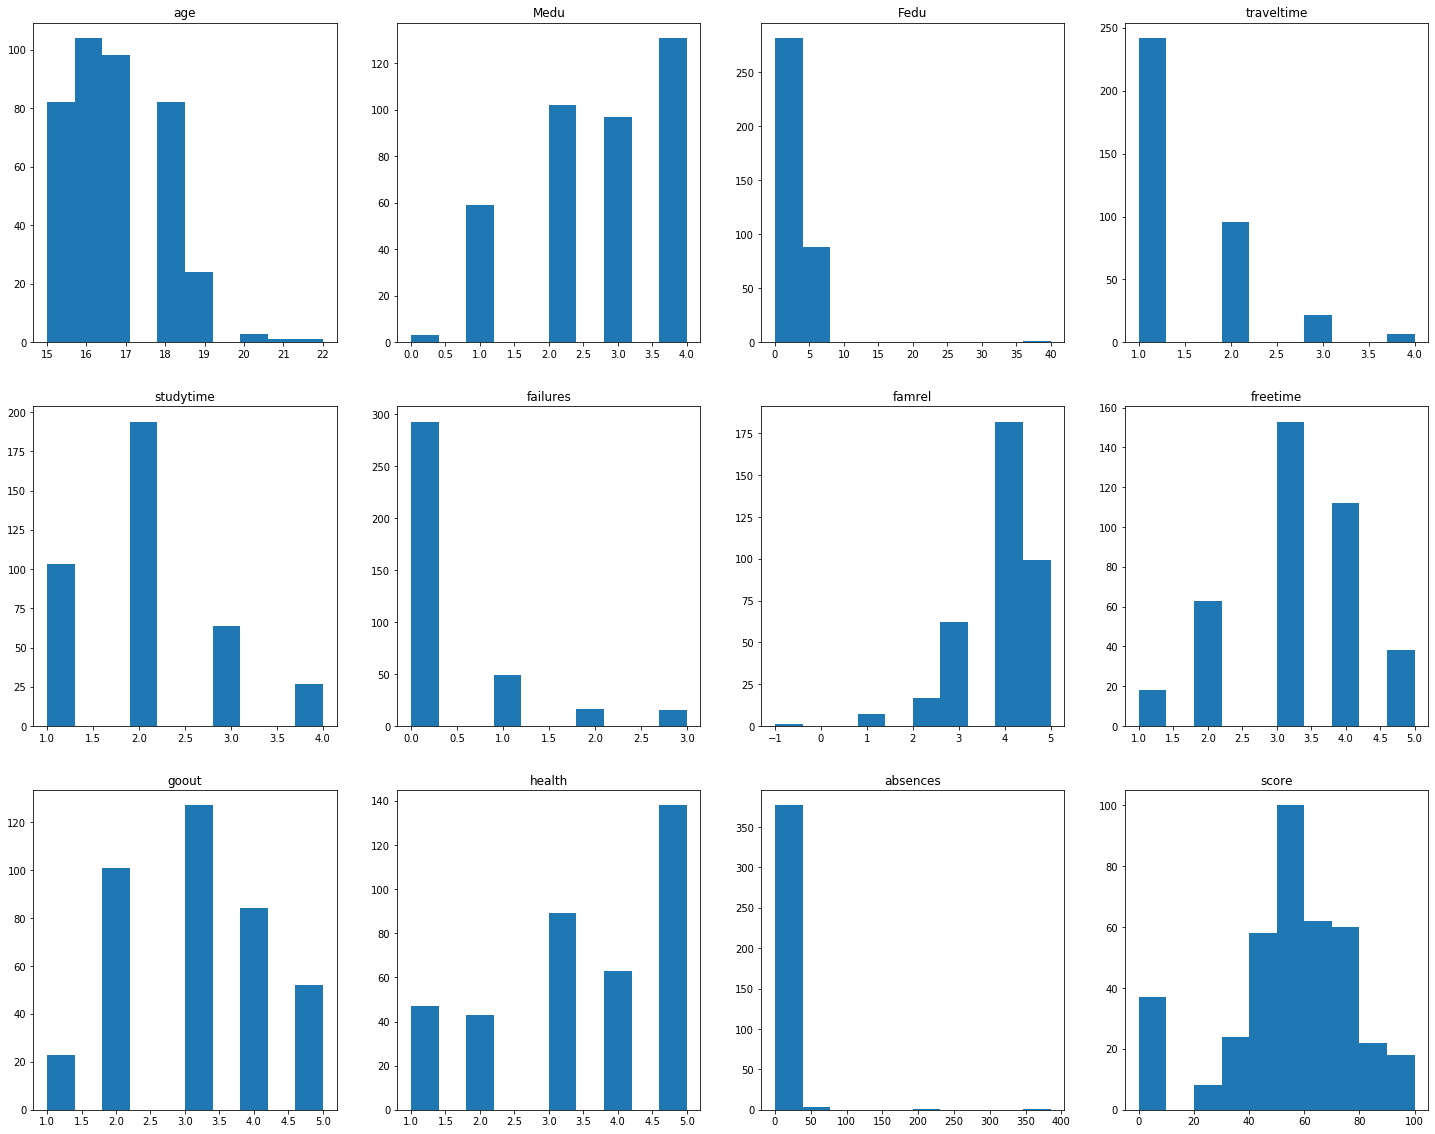

In [6]:
title=['age', 'Medu', 'Fedu', 'traveltime'] 
title_two=['studytime', 'failures', 'famrel', 'freetime']
title_three=['goout', 'health', 'absences', 'score']
fig, axes=plt.subplots(3,4, figsize=(25,20))
for i in range(4):
    axes[0][i].hist(study['{}'.format(title[i])])
    axes[0][i].set_title('{}'.format(title[i]))
    axes[1][i].hist(study['{}'.format(title_two[i])])
    axes[1][i].set_title('{}'.format(title_two[i]))
    axes[2][i].hist(study['{}'.format(title_three[i])])
    axes[2][i].set_title('{}'.format(title_three[i]))

#### Из графиков видно, что потенциальные выбросы наблюдаются в переменных Fedu, famrel, absences, score. Рассмотрим подробнее эти переменные.

### Столбец Fedu

In [7]:
display(study.Fedu.value_counts())

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

#### В описании столбца сказано, что градация значений от 0 до 4. Значение 40 - явный выброс, удаляем всю строку.

In [8]:
study = study.loc[study.Fedu != 40]

### Столбец famrel

In [9]:
display(study.famrel.value_counts())

 4.0    182
 5.0     98
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

#### В описании столбца сказано, что градация значений от 1 до 5. Значение -1 - явный выброс, удаляем всю строку.

In [10]:
study = study.loc[study.famrel != -1]

### Столбец absences

#### "Потолок" для прогулов не установлен и теоретически ученики могут по разным причинам пропускать много занятий. Но тем не менее выбросы возможны. Воспользуемся формулой интерквартильного расстояния для определения границ выбросов.

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


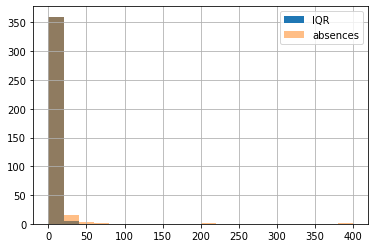

In [11]:
IQR_abs = study.absences.quantile(0.75) - study.absences.quantile(0.25)
abs25 = study.absences.quantile(0.25)
abs75 = study.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(abs25), '75-й перцентиль: {},'.format(abs75)
      , "IQR: {}, ".format(IQR_abs),"Границы выбросов: [{f}, {l}].".format(f=abs25 - 1.5*IQR_abs, l=abs75 + 1.5*IQR_abs))
study.absences.loc[study.absences.between(abs25 - 1.5*IQR_abs, abs75 + 1.5*IQR_abs)].hist(bins = 20, range = (0, 400),label = 'IQR')
study.absences.hist(alpha = 0.5, bins = 20, range = (0, 400),label = 'absences')
plt.legend();

#### По формуле вычислили, что все значения выше 20 являются выбросами. Так и примем.

In [12]:
study = study.loc[(study.absences <= 20)|(study.absences.isna())]

### Столбец score

In [13]:
display(study.score.value_counts())

50.0     54
55.0     42
0.0      37
75.0     33
65.0     30
60.0     30
70.0     27
40.0     27
45.0     23
80.0     16
30.0     14
90.0     10
35.0      9
25.0      7
95.0      5
85.0      5
100.0     1
Name: score, dtype: int64

#### Наблюдается 37 строк с нулевым баллом за экзамен по математике. По моему мнению, такой балл можно получить, если ученик:
#### - по какой-либо причине не явился на сам экзамен или был удален с него;
#### - сильно переволновался или что-то случилось накануне, что повлияло на его настрой;
#### - не имеет абсолютно никаких знаний по математике;
#### - либо в графе ошибка.
#### Рассмотрим подробнее данные случаи.

In [14]:
display(study[study.score==0])

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
128,GP,M,18,R,NaN,T,2.0,2.0,NaN,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
130,GP,F,15,R,GT3,T,3.0,4.0,services,teacher,course,father,2.0,3.0,2.0,no,yes,no,no,yes,yes,yes,yes,4.0,2.0,2.0,5.0,0.0,0.0
131,GP,F,15,U,GT3,NaN,1.0,1.0,at_home,other,course,mother,3.0,1.0,0.0,no,yes,no,yes,no,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
134,GP,M,15,R,GT3,T,3.0,4.0,at_home,teacher,course,mother,NaN,2.0,0.0,no,yes,no,no,yes,yes,no,yes,5.0,3.0,3.0,5.0,0.0,0.0
135,GP,F,15,U,GT3,T,4.0,4.0,services,NaN,course,mother,1.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,yes,4.0,3.0,3.0,5.0,0.0,0.0
136,GP,M,17,R,GT3,T,3.0,4.0,at_home,other,course,mother,3.0,2.0,0.0,no,no,NaN,no,yes,yes,no,no,NaN,4.0,5.0,5.0,0.0,0.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,NaN,father,2.0,4.0,0.0,yes,yes,no,NaN,yes,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
144,GP,M,17,U,GT3,T,2.0,1.0,other,other,home,NaN,1.0,1.0,3.0,no,yes,no,no,yes,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0.0
146,GP,F,15,U,GT3,T,3.0,2.0,health,services,home,father,1.0,2.0,3.0,no,NaN,no,no,yes,yes,yes,no,3.0,3.0,2.0,3.0,0.0,0.0


#### Как видно по данным из таблицы, данные ученики ни разу не пропускали занятия, в большинстве случаев имеют хорошее здоровье, желание учиться в высших учебных заведениях, хорошие отношения с родными, они по-разному проводят свободное время, у их родителей разный уровень образования. Таким образом, все вышеперечисленные мной причины получить нулевой балл имеют место быть, конкретной тенденции не наблюдается. Такие данные могут внести некоторую необъективность в будущую модель. Но в то же время 0 баллов - это тоже оценка, считать 37 строк выбросами нерационально. Их удаление может привести к потере уникальных данных, например таких как ученик № 389, у которого наблюдается социальная изолированность, возможно связанная с его семьей. Так как цель проекта - отследить учеников с потенциальными рисками провала на экзаменах по условиям их жизни, то отсеивание подобных случаев недопустимо.
#### Проверим правильность суждений формулой интерквартильного расстояния.

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


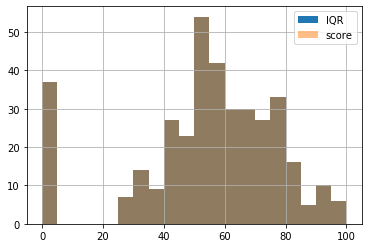

In [15]:
IQR_scr = study.score.quantile(0.75) - study.score.quantile(0.25)
scr25 = study.score.quantile(0.25)
scr75 = study.score.quantile(0.75)
print('25-й перцентиль: {},'.format(scr25), '75-й перцентиль: {},'.format(scr75)
      , "IQR: {}, ".format(IQR_scr),"Границы выбросов: [{f}, {l}].".format(f=scr25 - 1.5*IQR_scr, l=scr75 + 1.5*IQR_scr))
study.score.loc[study.score.between(scr25 - 1.5*IQR_scr, scr75 + 1.5*IQR_scr)].hist(bins = 20, range = (0, 100),label = 'IQR')
study.score.hist(alpha = 0.5, bins = 20, range = (0, 100),label = 'score')
plt.legend();

#### Как видно, все данные из столбца score лежат в допустимых границах, выбросов нет.

### 3.2 Заполнение пропусков для количественных переменных

#### Выведем среднеарифметические и медианные значения каждой из количественных переменных, кроме переменной 'age', у которой пропусков нет.

In [16]:
study_digit=pd.DataFrame(study,columns = ['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel'
                                          ,'freetime', 'goout', 'health', 'absences', 'score'])
for i in range(11):
    print('Столбец "{}":\n'.format(study_digit.columns[i]), '\tСреднее арифметическое:'
          ,round(study_digit['{}'.format(study_digit.columns[i])].mean(),2),'\n'
         ,'\tМедиана:', study_digit['{}'.format(study_digit.columns[i])].median())

Столбец "Medu":
 	Среднее арифметическое: 2.73 
 	Медиана: 3.0
Столбец "Fedu":
 	Среднее арифметическое: 2.5 
 	Медиана: 2.0
Столбец "traveltime":
 	Среднее арифметическое: 1.43 
 	Медиана: 1.0
Столбец "studytime":
 	Среднее арифметическое: 2.05 
 	Медиана: 2.0
Столбец "failures":
 	Среднее арифметическое: 0.32 
 	Медиана: 0.0
Столбец "famrel":
 	Среднее арифметическое: 3.95 
 	Медиана: 4.0
Столбец "freetime":
 	Среднее арифметическое: 3.26 
 	Медиана: 3.0
Столбец "goout":
 	Среднее арифметическое: 3.11 
 	Медиана: 3.0
Столбец "health":
 	Среднее арифметическое: 3.54 
 	Медиана: 4.0
Столбец "absences":
 	Среднее арифметическое: 4.58 
 	Медиана: 3.5
Столбец "score":
 	Среднее арифметическое: 52.24 
 	Медиана: 55.0


#### Заменим пропуски медианными значениями каждого из признаков.

In [17]:
for i in range(11):
    median=study_digit['{}'.format(study_digit.columns[i])].median()
    study['{}'.format(study_digit.columns[i])] = study_digit['{}'.format(study_digit.columns[i])].fillna(median)

#### Еще раз построим гистограммы распределений для количественных переменных.

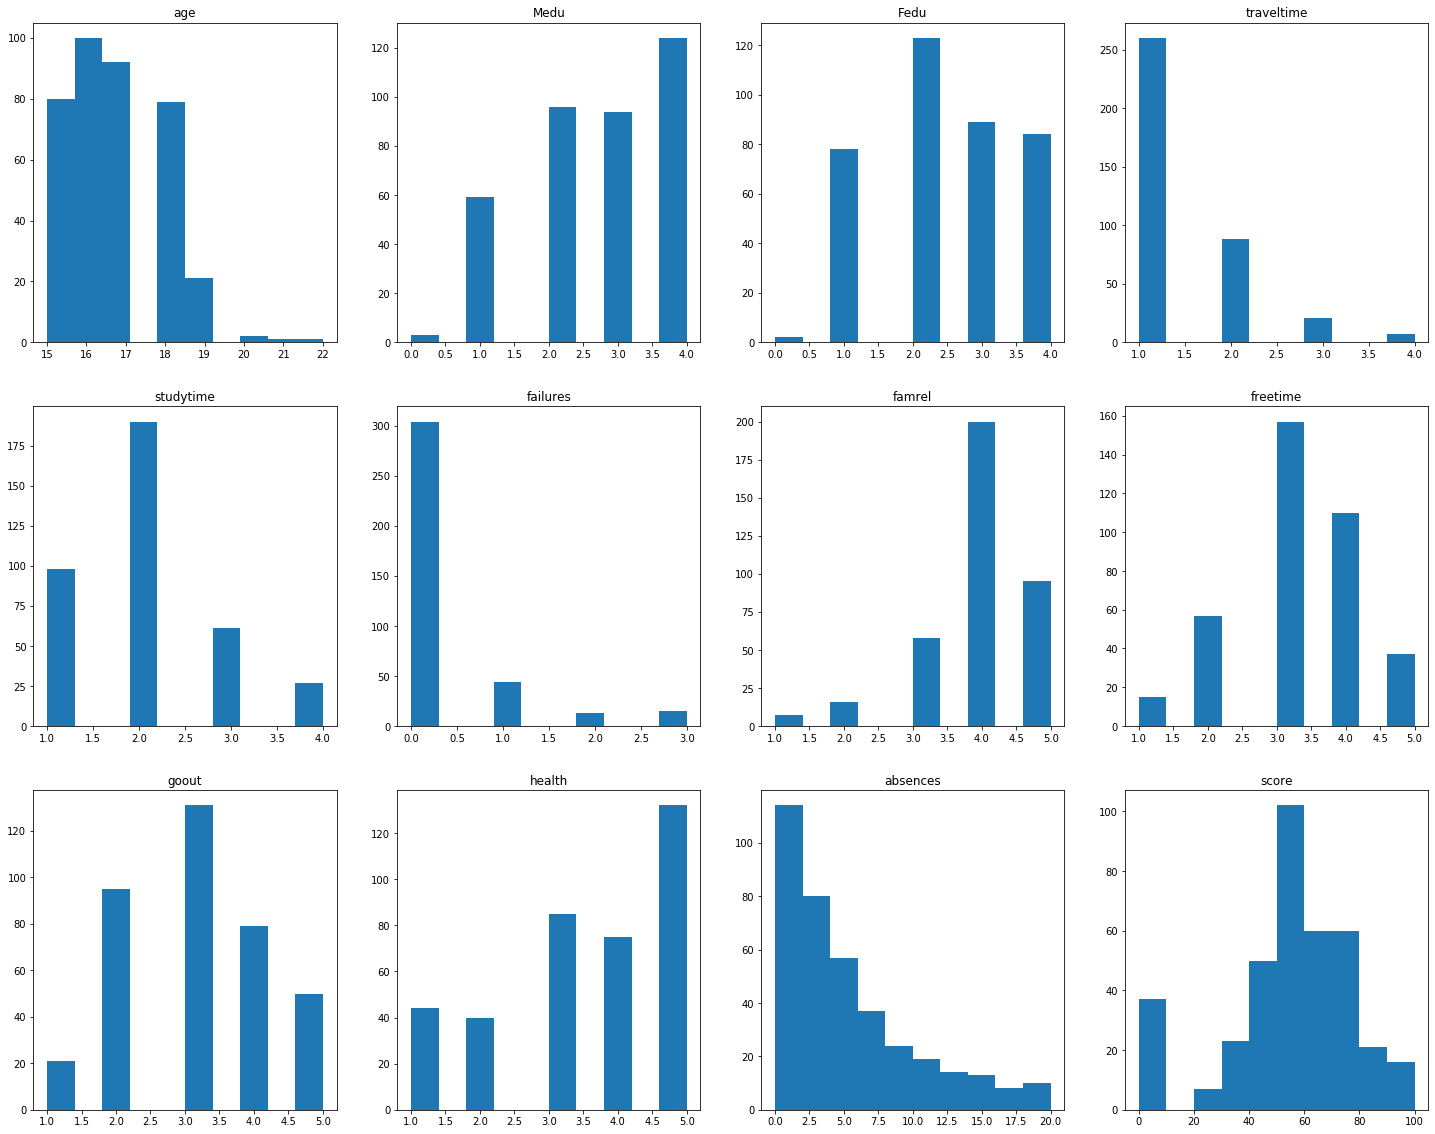

In [18]:
title=['age', 'Medu', 'Fedu', 'traveltime'] 
title_two=['studytime', 'failures', 'famrel', 'freetime']
title_three=['goout', 'health', 'absences', 'score']
fig, axes=plt.subplots(3,4, figsize=(25,20))
for i in range(4):
    axes[0][i].hist(study['{}'.format(title[i])])
    axes[0][i].set_title('{}'.format(title[i]))
    axes[1][i].hist(study['{}'.format(title_two[i])])
    axes[1][i].set_title('{}'.format(title_two[i]))
    axes[2][i].hist(study['{}'.format(title_three[i])])
    axes[2][i].set_title('{}'.format(title_three[i]))

#### По итоговым гистограммам можно сделать некоторые наблюдения:
#### - ученики старше 19 лет скорее всего оставались в процессе обучения на второй год, может и не раз, или может были поздно отданы в школу, но таких учеников мало. В стране наблюдения основная масса учеников заканчивает школу до 18ти лет;
#### - среди родителей преобладает образование в 9 классов школы и выше, но и встречается достаточно случаев с образованием в 4 класса школы, что может сказываться и на результатах самих детей как родительский пример или могут быть хуже условия жизни таких семей;
#### - в большинстве случаев школа выбирается ближе к дому (до получаса пути);
#### - мало случаев зафиксированных внеучебных неудач, что может говорить как и о том, что у большинства учеников их и правда нет, так и о том, что случаи просто замалчиваются;
#### - у примерно четверти учащихся есть проблемы со здоровьем, что может сказываться на учебе и результатах таких учеников;
#### - про случаи с 0 баллов за экзамен по математике было сказано выше.

### 3.3 Корреляционный анализ количественных переменных и отбор некоррелирующих переменных

#### Построим матрицу корреляции.

(12.0, 0.0)

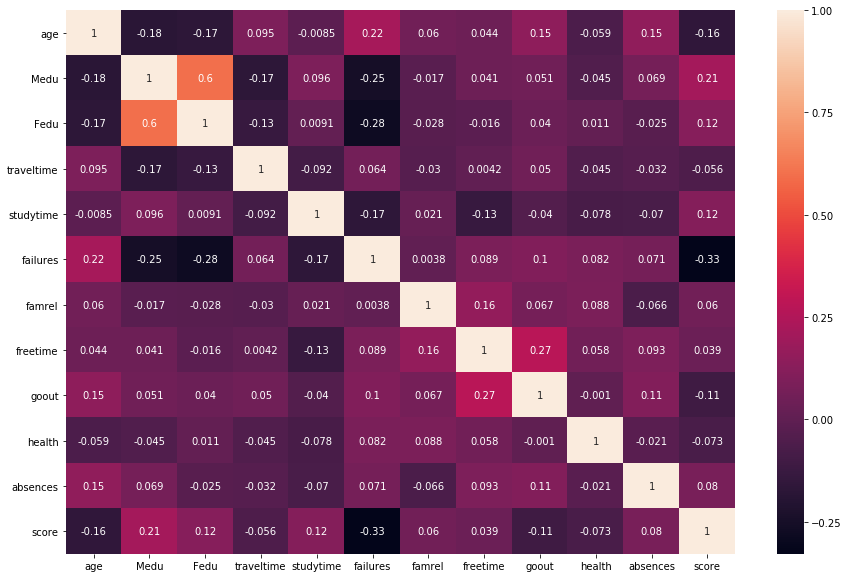

In [19]:
Corr_study=study.corr()
plt.figure(figsize=(15,10))
Corr_graf=sns.heatmap(data=Corr_study, annot=True)
i, k = Corr_graf.get_ylim()
Corr_graf.set_ylim(i+0.5, k-0.5)

In [20]:
print('Ранг матрицы корреляции:', np.linalg.matrix_rank(Corr_study)
      , '\nОпределитель матрицы корреляции:', round(np.linalg.det(Corr_study),2))

Ранг матрицы корреляции: 12 
Определитель матрицы корреляции: 0.32


#### Матрица корреляции получилась размером 12х12, ранг матрицы максимальный, определитель не равен и не близок к нулю. Прямых линейных зависимостей или сильных взаимосвязей между факторами не наблюдается. Это говорит о том, что случаев чистой коллинеарности и мультиколлинеарности нет. Таким образом, для будущей модели можно оставить все количественные переменные.
#### Также можно сделать некоторые выводы:
#### - средняя взаимосвязь между факторами Medu и Fedu говорит о том, что люди чаще всего выбирают себе в супруги людей из своего социального статуса, уровня образования и т.д., но это не является обязательным условием создания семьи;
#### - внеучебные неудачи отрицательно сказываются на итоговом балле сильнее других факторов. А так как есть вероятность замалчивания неудач, то реальная картина может быть еще серьезнее. Возможно руководству школ стоит чаще обращать внимание на этот аспект и привлекать школьных психологов для работы с учениками и помощи в решении личных проблем и конфликтов. 
#### - на положительную корреляцию количества пропущенных занятий и итогового балла повлияли случаи с нулевыми баллами, где количество прогулов было равно нулю, что подтвердило размышления о внесении данными некоторой необъективности в конечный результат.

### 3.4 Промежуточные выводы работы с количественными переменными

#### - выбросы встретились только в трех переменных, что говорит о достаточной чистоте данных;
#### - корреляционный анализ выявил, что все количественные переменные могут быть использованы в дальнейшем. А чем больше данных используется, тем лучше для самой модели и для выходного результата.

### 4. Работа с номинативными переменными

### 4.1 Анализ номинативных переменных

In [21]:
study_nomin=pd.DataFrame(study,columns = ['school', 'sex','address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason','guardian'
                                , 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'])

#### Для каждой номинативной переменной выведем количество пропусков, уникальные значения, их количество и распределение.

In [22]:
for i in range(17):
    print('Столбец "{}":\n'.format(study_nomin.columns[i])
          ,'\tКоличество пропусков:',study_nomin['{}'.format(study_nomin.columns[i])].isna().sum(),'\n'
          ,'\tУникальные значения:',study_nomin['{}'.format(study_nomin.columns[i])].unique(),'\n'
         ,'\tКоличество уникальных значений:', study_nomin['{}'.format(study_nomin.columns[i])].nunique(),'\n'
         ,'\tРаспределение уникальных значений:')
    print(study_nomin['{}'.format(study_nomin.columns[i])].value_counts(), '\n')

Столбец "school":
 	Количество пропусков: 0 
 	Уникальные значения: ['GP' 'MS'] 
 	Количество уникальных значений: 2 
 	Распределение уникальных значений:
GP    331
MS     45
Name: school, dtype: int64 

Столбец "sex":
 	Количество пропусков: 0 
 	Уникальные значения: ['F' 'M'] 
 	Количество уникальных значений: 2 
 	Распределение уникальных значений:
F    193
M    183
Name: sex, dtype: int64 

Столбец "address":
 	Количество пропусков: 17 
 	Уникальные значения: ['U' nan 'R'] 
 	Количество уникальных значений: 2 
 	Распределение уникальных значений:
U    278
R     81
Name: address, dtype: int64 

Столбец "famsize":
 	Количество пропусков: 25 
 	Уникальные значения: [nan 'GT3' 'LE3'] 
 	Количество уникальных значений: 2 
 	Распределение уникальных значений:
GT3    247
LE3    104
Name: famsize, dtype: int64 

Столбец "Pstatus":
 	Количество пропусков: 38 
 	Уникальные значения: ['A' nan 'T'] 
 	Количество уникальных значений: 2 
 	Распределение уникальных значений:
T    306
A     32
Nam

#### Как видно, преобладают переменные с двумя вариантами значений. Пропуски заполнять не будем, так как не знаем 

### 4.2 Заполнение пропусков для номинативных переменных

#### Для переменной reason пропуск заполним значением 'other', так как неизвестны конкретные причины выбора школы.

In [23]:
study.reason=study.reason.fillna('other')
display(study.reason.value_counts())

course        135
reputation     97
home           94
other          50
Name: reason, dtype: int64

#### Так как для переменной paid количество пропусков примерно равно разнице в распределении значений, то пропуски заполним значением 'yes' для уравнения.

In [24]:
study.paid=study.paid.fillna('yes')
display(study.paid.value_counts())

no     193
yes    183
Name: paid, dtype: int64

#### По такой же логике заполним пропуски в переменной activities значением 'no'.

In [25]:
study.activities=study.activities.fillna('no')
display(study.activities.value_counts())

yes    189
no     187
Name: activities, dtype: int64

#### В остальных переменных пропуски заполним самыми частыми значениями.

In [26]:
for i in range(17):
    top=study['{}'.format(study_nomin.columns[i])].value_counts().index[0]
    study['{}'.format(study_nomin.columns[i])]=study['{}'.format(study_nomin.columns[i])].fillna(top)
    print('Столбец "{}":\n'.format(study_nomin.columns[i])
          ,'\tКоличество пропусков:',study['{}'.format(study_nomin.columns[i])].isna().sum(),'\n'
          ,'\tУникальные значения:',study['{}'.format(study_nomin.columns[i])].unique(),'\n'
         ,'\tКоличество уникальных значений:', study['{}'.format(study_nomin.columns[i])].nunique(),'\n'
         ,'\tРаспределение уникальных значений:')
    print(study['{}'.format(study_nomin.columns[i])].value_counts(), '\n')

Столбец "school":
 	Количество пропусков: 0 
 	Уникальные значения: ['GP' 'MS'] 
 	Количество уникальных значений: 2 
 	Распределение уникальных значений:
GP    331
MS     45
Name: school, dtype: int64 

Столбец "sex":
 	Количество пропусков: 0 
 	Уникальные значения: ['F' 'M'] 
 	Количество уникальных значений: 2 
 	Распределение уникальных значений:
F    193
M    183
Name: sex, dtype: int64 

Столбец "address":
 	Количество пропусков: 0 
 	Уникальные значения: ['U' 'R'] 
 	Количество уникальных значений: 2 
 	Распределение уникальных значений:
U    295
R     81
Name: address, dtype: int64 

Столбец "famsize":
 	Количество пропусков: 0 
 	Уникальные значения: ['GT3' 'LE3'] 
 	Количество уникальных значений: 2 
 	Распределение уникальных значений:
GT3    272
LE3    104
Name: famsize, dtype: int64 

Столбец "Pstatus":
 	Количество пропусков: 0 
 	Уникальные значения: ['A' 'T'] 
 	Количество уникальных значений: 2 
 	Распределение уникальных значений:
T    344
A     32
Name: Pstatus, dty

### 4.3 Отбор номинативных переменных для будущей модели

#### Построим графики распределения итогового балла по математике в зависимости от значения номинативных переменных (боксплоты)

In [27]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (7, 4))
    sns.boxplot(x=column, y='score', 
                data=study)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

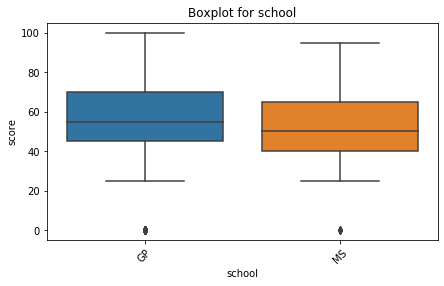

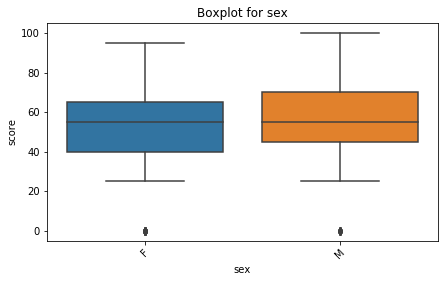

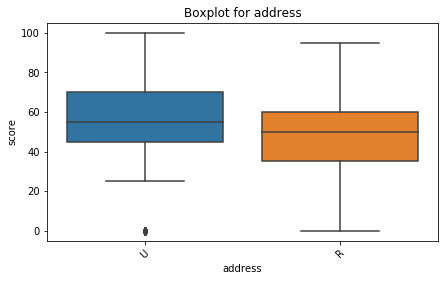

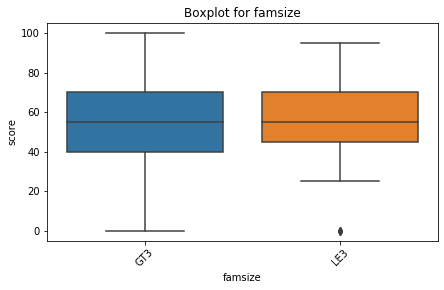

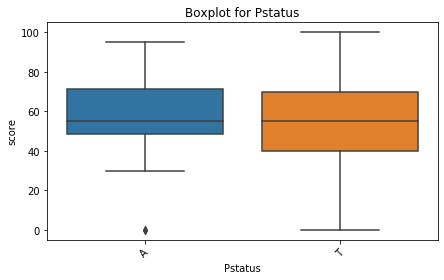

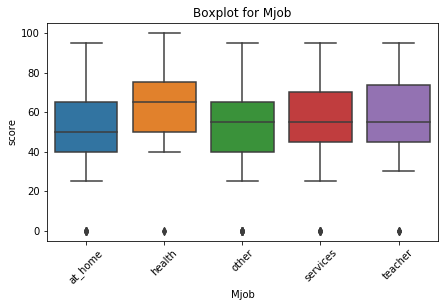

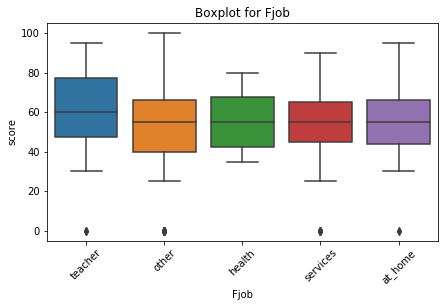

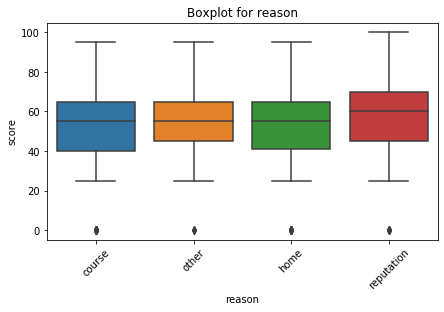

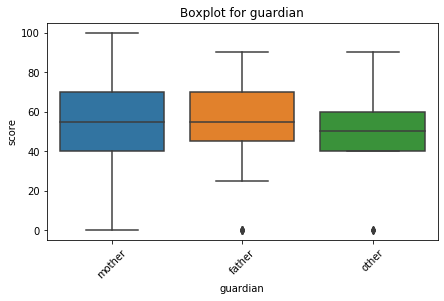

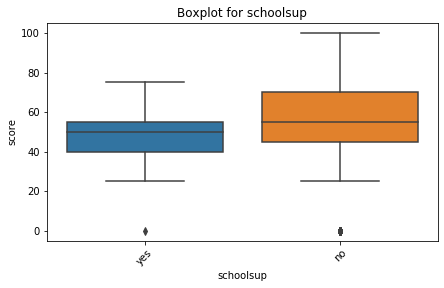

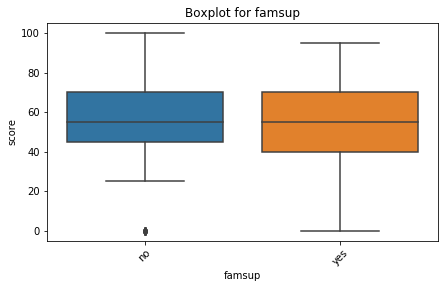

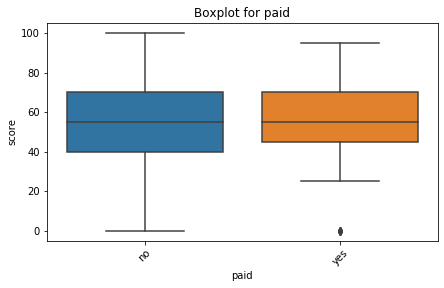

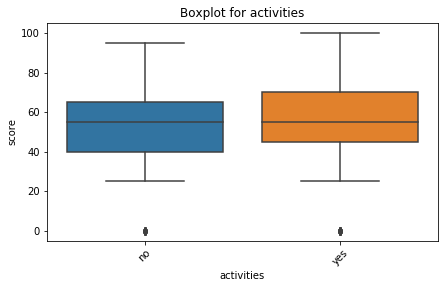

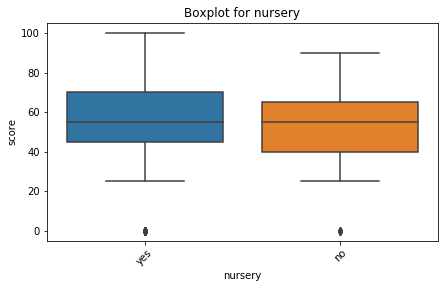

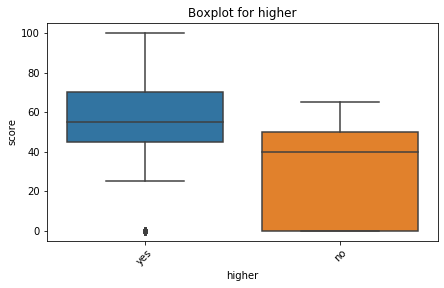

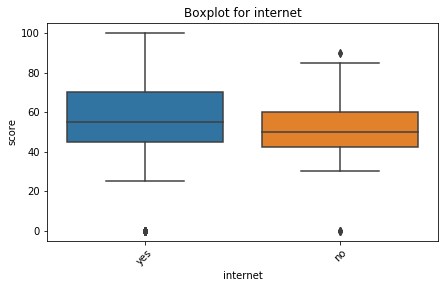

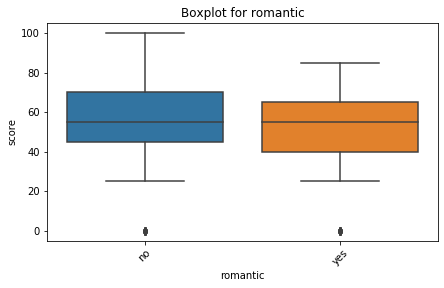

In [28]:
for col in study_nomin.columns:
    get_boxplot(col)

#### Применим тест Стьюдента для проверки нулевой гипотезы о том, что распределения итогового балла за экзамен по различным параметрам неразличимы.

In [29]:
def get_stat_dif(column):
    cols = study.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(study.loc[study.loc[:, column] == comb[0], 'score'], 
                        study.loc[study.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [30]:
for col in study_nomin.columns:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


#### Проверка нулевой гипотезы выявила, что серьезно отличаются шесть параметров: sex, address, Mjob, paid, higher, romantic. Оставим эти параметры в Датасете для будущей модели.

### 5. Основные итоги работы над проектом
#### - В исходном Датасете присутствовал признак без описания 'studytime, granular' с отрицательными значениями. Удален при первичной обработке данных.
#### - В Датасете немного пустых значений (до 11% от всех значений для отдельных признаков), у трех признаков (school, sex, age) пропусков не было вовсе. Исходные данные можно считать достаточно чистыми. В процессе работы пропуски были заполнены как и для количественных, так и для номинативных переменных.
#### - Выбросы встретились только у признаков Fedu, famrel, absences, что также говорит о достаточной чистоте исходных данных. Выбросы были устранены.
#### - Корреляционный анализ показал, что прямых линейных зависимостей или сильных взаимосвязей между факторами нет. Тем самым для построения будущей модели были взяты все количественные переменные.
#### - Статистический анализ номинативных переменных с помощью теста Стьюдента определил значимые различия для шести переменных: sex, address, Mjob, paid, higher, romantic.
#### - Самыми важными признаками, вошедшими в итоговый Датасет для построения модели, являются 17 признаков: sex, age, address, Medu, Fedu, Mjob, traveltime, studytime, failures, paid, higher, romantic, famrel, freetime, goout, health, absences.

### Итоговый Датасет

In [31]:
study_final=pd.DataFrame(study,columns = ['sex', 'age', 'address', 'Medu', 'Fedu', 'Mjob', 'traveltime', 'studytime', 'failures'
                                ,'paid', 'higher', 'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score'])
display(study_final.head(10))
study_final.info()

,sex,age,address,Medu,Fedu,Mjob,traveltime,studytime,failures,paid,higher,romantic,famrel,freetime,goout,health,absences,score
0,F,18,U,4.0,4.0,at_home,2.0,2.0,0.0,no,yes,no,4.0,3.0,4.0,3.0,6.0,30.0
1,F,17,U,1.0,1.0,at_home,1.0,2.0,0.0,no,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,F,15,U,1.0,1.0,at_home,1.0,2.0,3.0,yes,yes,no,4.0,3.0,2.0,3.0,10.0,50.0
3,F,15,U,4.0,2.0,health,1.0,3.0,0.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,F,16,U,3.0,3.0,other,1.0,2.0,0.0,yes,yes,no,4.0,3.0,2.0,5.0,4.0,50.0
5,M,16,U,4.0,3.0,services,1.0,2.0,0.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,M,16,U,2.0,2.0,other,1.0,2.0,0.0,no,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,F,17,U,4.0,4.0,other,2.0,2.0,0.0,no,yes,no,4.0,1.0,4.0,1.0,6.0,30.0
8,M,15,U,3.0,2.0,services,1.0,2.0,0.0,yes,yes,no,4.0,2.0,2.0,1.0,0.0,95.0
9,M,15,U,3.0,4.0,other,1.0,2.0,0.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 394
Data columns (total 18 columns):
sex           376 non-null object
age           376 non-null int64
address       376 non-null object
Medu          376 non-null float64
Fedu          376 non-null float64
Mjob          376 non-null object
traveltime    376 non-null float64
studytime     376 non-null float64
failures      376 non-null float64
paid          376 non-null object
higher        376 non-null object
romantic      376 non-null object
famrel        376 non-null float64
freetime      376 non-null float64
goout         376 non-null float64
health        376 non-null float64
absences      376 non-null float64
score         376 non-null float64
dtypes: float64(11), int64(1), object(6)
memory usage: 65.8+ KB
